In [1]:
import numpy as np
import matplotlib 
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from __future__ import division
from IPython.core.debugger import set_trace

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

In [2]:
shoppings = pd.read_csv('./data/supermarket_data.csv')

In [3]:
shoppings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671914 entries, 0 to 671913
Data columns (total 8 columns):
SHOP_DATE     671914 non-null int64
SHOP_HOUR     671914 non-null int64
BASKET_ID     671914 non-null int64
CUST_CODE     671914 non-null object
STORE_CODE    671914 non-null object
PROD_CODE     671914 non-null object
QUANTITY      671914 non-null int64
SPEND         671914 non-null float64
dtypes: float64(1), int64(4), object(3)
memory usage: 41.0+ MB


In [4]:
shoppings['SHOP_DATE'] =  shoppings['SHOP_DATE'].apply(str)
shoppings['SHOP_DATE'] = pd.to_datetime(shoppings['SHOP_DATE'], format='%Y%m%d')
#shoppings['SHOP_TIME_DATE'] = shoppings['SHOP_DATE'] + pd.to_timedelta(shoppings['SHOP_HOUR'], unit='h')

In [5]:
shoppings['STORE_CODE'].unique()

array(['STORE00001', 'STORE00002', 'STORE00003', 'STORE00004'],
      dtype=object)

### Which products are picked the most often?

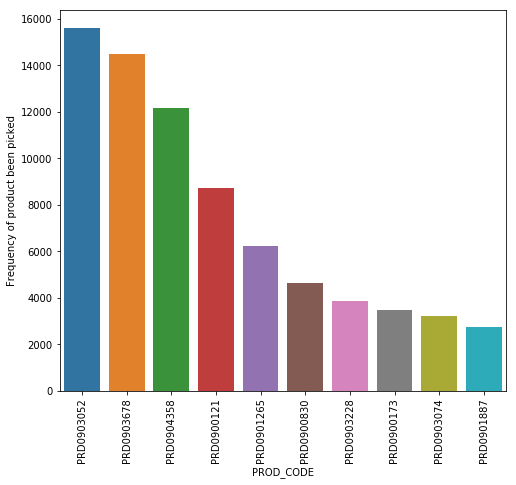

In [6]:
groupby_by_product = shoppings.groupby('PROD_CODE', as_index=False)

number_of_picked_by_products = groupby_by_product['BASKET_ID'].count()
most_picked_products = number_of_picked_by_products.sort_values('BASKET_ID', ascending=False)[:10]

plt.figure(figsize=(8, 7))
sns.barplot(data=most_picked_products, x='PROD_CODE', y='BASKET_ID', order=most_picked_products['PROD_CODE'])
plt.xticks(rotation=90)
plt.ylabel('Frequency of product been picked')
plt.show()

### Which products produce the most sales?

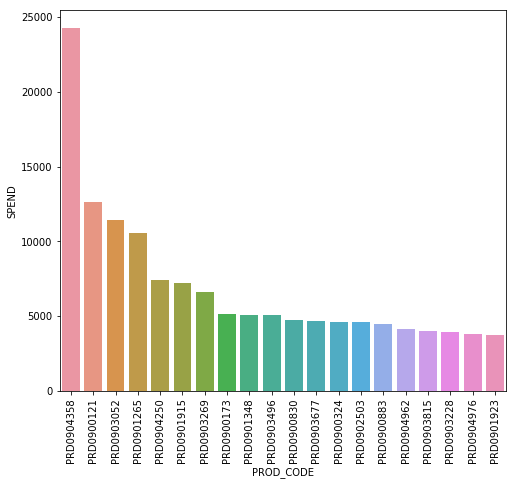

In [7]:
sales_by_products = groupby_by_product['SPEND'].sum()
top_sales = sales_by_products.sort_values('SPEND', ascending=False)[:20]

plt.figure(figsize=(8, 7))
sns.barplot(data=top_sales, x='PROD_CODE', y='SPEND', order=top_sales['PROD_CODE'])
plt.xticks(rotation=90)
plt.show()

### For each product, How many  items have been sold for a day?

In [146]:
total_quantity_by_products = groupby_by_product.agg({
    'QUANTITY' : np.sum
})

days_duration_by_products = groupby_by_product.agg({
    'SHOP_DATE' : ['max', 'min']
}).assign(
    DAYS = lambda row: (row['SHOP_DATE']['max'] - row['SHOP_DATE']['min']).apply(lambda x: x.days)
).drop(columns=['SHOP_DATE'])
days_duration_by_products.columns = days_duration_by_products.columns.droplevel(1) 

number_items_sold_a_day_by_products = pd.merge(total_quantity_by_products, days_duration_by_products, on='PROD_CODE')
number_items_sold_a_day_by_products = number_items_sold_a_day_by_products.loc[ number_items_sold_a_day_by_products['DAYS']>0,:]
number_items_sold_a_day_by_products = number_items_sold_a_day_by_products.assign(
    ITEMS_SOLD_PER_DAY = lambda row: row['QUANTITY'] / row['DAYS']
)

top_sold_per_day = number_items_sold_a_day_by_products.sort_values('ITEMS_SOLD_PER_DAY', ascending=False)[:10]

In [148]:
top_sold_per_day

,PROD_CODE,QUANTITY,DAYS,ITEMS_SOLD_PER_DAY
3661,PRD0903678,92694,552,167.923913
4338,PRD0904358,15738,552,28.510870
3038,PRD0903052,15587,552,28.237319
120,PRD0900121,12861,552,23.298913
3255,PRD0903269,7234,552,13.105072
1259,PRD0901265,6225,552,11.277174
4026,PRD0904044,5728,552,10.376812
3116,PRD0903130,5667,551,10.284936
827,PRD0900830,4902,552,8.880435
3064,PRD0903078,4825,552,8.740942
